In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)
pd.set_option('display.max_seq_items', None)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
w= pd.read_csv(r'..\\datasets\\produccin-de-pozos-de-gas-y-petrleo-no-convencional.csv')  

In [13]:
w

,idempresa,anio,mes,idpozo,prod_pet,prod_gas,prod_agua,iny_agua,iny_gas,iny_co2,iny_otro,tef,vida_util,tipoextraccion,tipoestado,tipopozo,observaciones,fechaingreso,rectificado,habilitado,idusuario,empresa,sigla,formprod,profundidad,formacion,idareapermisoconcesion,areapermisoconcesion,idareayacimiento,areayacimiento,cuenca,provincia,coordenadax,coordenaday,tipo_de_recurso,proyecto,clasificacion,subclasificacion,sub_tipo_recurso,fecha_data
0,YSUR,2018,1,156805,136.914000,1240.232000,166.780000,0.0,0.0,0.0,0.0,31.000000,NaN,Surgencia Natural,Extracción Efectiva,Gasífero,NaN,2018-02-10 08:37:14.717426,f,t,444,YSUR ENERGÍA ARGENTINA S.R.L.,YSR.RN.EFO-154(d),LAJA,3878.0,lajas,FEO,ESTACION FERNANDEZ ORO,Z155,ESTACION FERNANDEZ ORO,NEUQUINA,Rio Negro,-67.858318,-39.007369,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,TIGHT,2018-01-31
1,YSUR,2016,1,135209,29.080000,617.770000,32.280000,0.0,0.0,0.0,0.0,31.000000,NaN,Surgencia Natural,Extracción Efectiva,Gasífero,NaN,2016-02-17 10:50:46.929347,f,t,5,YSUR ENERGÍA ARGENTINA S.R.L.,APA.RN.EFO-132(d),LAJA,3940.0,lajas,FEO,ESTACION FERNANDEZ ORO,Z155,ESTACION FERNANDEZ ORO,NEUQUINA,Rio Negro,-67.849834,-39.020619,NO CONVENCIONAL,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT,2016-01-31
2,YSUR,2018,1,158256,271.874000,307.871000,115.570000,0.0,0.0,0.0,0.0,31.000000,NaN,Surgencia Natural,Extracción Efectiva,Gasífero,NaN,2018-02-10 08:37:14.717426,f,t,444,YSUR ENERGÍA ARGENTINA S.R.L.,YEA.RN.EFO-308(d),LAJA,4411.0,lajas,FEO,ESTACION FERNANDEZ ORO,Z155,ESTACION FERNANDEZ ORO,NEUQUINA,Rio Negro,-67.823235,-39.011761,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,TIGHT,2018-01-31
3,YSUR,2016,1,134010,51.350000,378.650000,11.500000,0.0,0.0,0.0,0.0,31.000000,NaN,Surgencia Natural,Extracción Efectiva,Gasífero,NaN,2016-02-17 10:50:46.929347,f,t,5,YSUR ENERGÍA ARGENTINA S.R.L.,APA.RN.EFO-109(d),LAJA,3883.0,lajas,FEO,ESTACION FERNANDEZ ORO,Z155,ESTACION FERNANDEZ ORO,NEUQUINA,Rio Negro,-67.862415,-39.022839,NO CONVENCIONAL,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT,2016-01-31
4,YSUR,2018,1,131068,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,NaN,Sin Sistema de Extracción,En Estudio,Otro tipo,NaN,2018-02-10 08:37:14.717426,f,t,444,YSUR ENERGÍA ARGENTINA S.R.L.,AEA.RN.EFO-45ST,LAJA,3816.0,lajas,FEO,ESTACION FERNANDEZ ORO,Z155,ESTACION FERNANDEZ ORO,NEUQUINA,Rio Negro,-67.878573,-39.009753,NO CONVENCIONAL,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT,2018-01-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271665,ACO,2023,8,146101,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,NaN,Bombeo Mecánico,Extracción Efectiva,Gasífero,ACO,2023-09-08 10:34:08.545758,f,t,459,Petrolera Aconcagua Energia S.A.,PEL.RN.JQ.e-2,TORD,3780.0,tordillo,AAMA,JARILLA QUEMADA,JQUE,JARILLA QUEMADA,NEUQUINA,Rio Negro,-67.963790,-38.460750,NO CONVENCIONAL,GAS PLUS,EXPLORACION,EXTENSION,TIGHT,2023-08-31
271666,ACO,2023,9,146101,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,NaN,Bombeo Mecánico,Extracción Efectiva,Gasífero,ACO,2023-10-06 22:21:38.628083,f,t,459,Petrolera Aconcagua Energia S.A.,PEL.RN.JQ.e-2,TORD,3780.0,tordillo,AAMA,JARILLA QUEMADA,JQUE,JARILLA QUEMADA,NEUQUINA,Rio Negro,-67.963790,-38.460750,NO CONVENCIONAL,GAS PLUS,EXPLORACION,EXTENSION,TIGHT,2023-09-30
271667,ACO,2023,9,164503,240.171667,2006.971943,312.904842,0.0,0.0,0.0,0.0,30.000000,NaN,Surgencia Natural,Extracción Efectiva,Petrolífero,ACO,2023-10-06 22:21:38.628083,f,t,459,Petrolera Aconcagua Energia S.A.,ACO.RN.CB.xp-2008(d),PROS,2858.0,punta rosada,ELO,ENTRE LOMAS,CHB,CHARCO BAYO,NEUQUINA,Rio Negro,-68.085408,-38.211980,NO CONVENCIONAL,Sin Proyecto,EXPLORACION,EXPLORATORIO PROFUNDO,TIGHT,2023-09-30
271668,ACO,2023,9,164374,297.101504,3217.431504,4.941691,0.0,0.0,0.0,0.0,30.000000,NaN,Surgencia Natural,Extracción Efectiva,Petrolífero,ACO,2023-10-06 22:21:38.628083,f,t,459,Petrolera Aconcagua Energia S.A.,ACO.RN.CB-2003,PROS,2840.0,punta ros

In [3]:
forma = w.shape
f"El dataset tiene {forma[0]} filas y {forma[1]} columnas"

'El dataset tiene 271670 filas y 40 columnas'

In [4]:
dupl = w.duplicated()
print(dupl.value_counts())

False    271670
dtype: int64


In [5]:
print(w.columns)

Index(['idempresa', 'anio', 'mes', 'idpozo', 'prod_pet', 'prod_gas', 'prod_agua', 'iny_agua', 'iny_gas', 'iny_co2', 'iny_otro', 'tef', 'vida_util',
       'tipoextraccion', 'tipoestado', 'tipopozo', 'observaciones', 'fechaingreso', 'rectificado', 'habilitado', 'idusuario', 'empresa', 'sigla',
       'formprod', 'profundidad', 'formacion', 'idareapermisoconcesion', 'areapermisoconcesion', 'idareayacimiento', 'areayacimiento', 'cuenca',
       'provincia', 'coordenadax', 'coordenaday', 'tipo_de_recurso', 'proyecto', 'clasificacion', 'subclasificacion', 'sub_tipo_recurso',
       'fecha_data'],
      dtype='object')


In [6]:
# Se observan cuántos valores faltantes tiene cada columna:
missing_values = w.isnull().sum().sort_values(ascending = False) 
        # datos faltantes ordenados de mayor a menor
        # según la columna
missing_values

vida_util                 265912
observaciones             256868
subclasificacion             786
clasificacion                786
tipoextraccion               543
tipopozo                     543
tipoestado                   543
sub_tipo_recurso             316
idempresa                      0
formacion                      0
idareapermisoconcesion         0
areapermisoconcesion           0
idareayacimiento               0
areayacimiento                 0
formprod                       0
cuenca                         0
provincia                      0
coordenadax                    0
coordenaday                    0
tipo_de_recurso                0
proyecto                       0
profundidad                    0
idusuario                      0
sigla                          0
iny_gas                        0
mes                            0
idpozo                         0
prod_pet                       0
prod_gas                       0
prod_agua                      0
iny_agua  

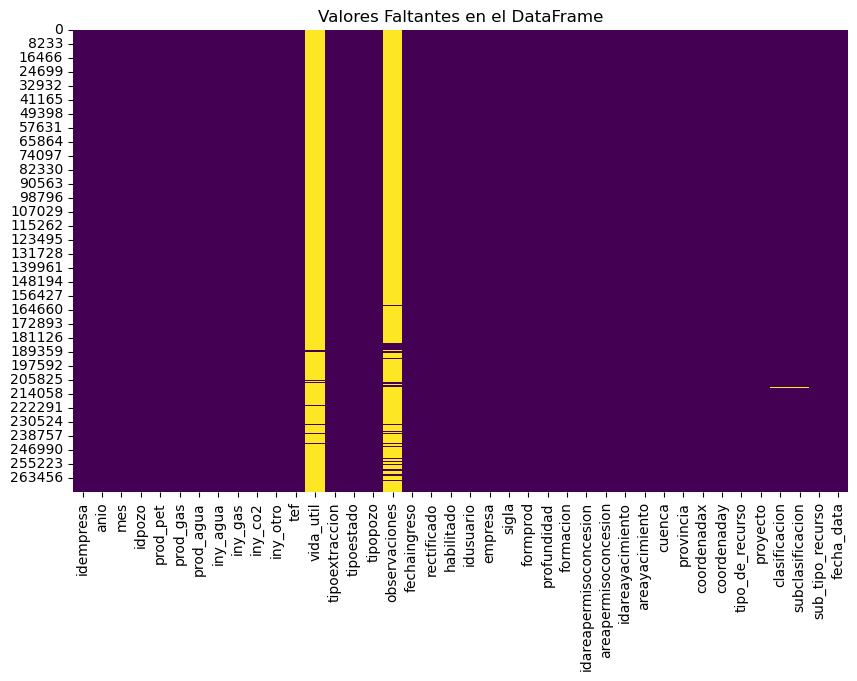

In [7]:
# visualización de valores faltantes
plt.figure(figsize=(10, 6))
sns.heatmap(w.isnull(), cmap='viridis', cbar=False)
plt.title('Valores Faltantes en el DataFrame')
plt.show()

In [16]:
tipoestado=w['tipoestado'].unique()
tipoestado

array(['Extracción Efectiva', 'En Estudio', 'En Reparación',
       'Parado Transitoriamente', 'En Reserva para Recup. Sec./Asist.',
       'En Espera de Reparación', 'Otras Situación Inactivo',
       'Abandonado', 'Abandono Temporario',
       'Parado Alta Relación Gas/Petróleo', 'A Abandonar',
       'En Reserva de Gas', 'Mantenimiento de Presión', nan,
       'Parado Alta Relación Agua/Petróleo', 'En Inyección Efectiva',
       'Otras Situación Activo'], dtype=object)

In [19]:
tipoextraccion=w['tipoextraccion'].unique()
tipoextraccion

array(['Surgencia Natural', 'Sin Sistema de Extracción', 'Plunger Lift',
       'Bombeo Mecánico', 'Otros Tipos de Extracción', 'Gas Lift', nan,
       'Jet Pump', 'Pistoneo (Swabbing)', 'Bombeo Hidráulico',
       'Electrosumergible', 'Cavidad Progresiva'], dtype=object)

In [14]:
anio=w['anio'].unique()
anio

array([2018, 2016, 2015, 2017, 2022, 2019, 2009, 2013, 2014, 2010, 2008,
       2011, 2012, 2006, 2007, 2023, 2020, 2021], dtype=int64)

In [15]:
contar_calif = w['anio'].value_counts()
print(contar_calif)

2022    38894
2021    34482
2020    31697
2023    30991
2019    28905
2018    24883
2017    20725
2016    17225
2015    12841
2014     8777
2013     5184
2012     3640
2011     2599
2007     2443
2006     2368
2008     2280
2010     2038
2009     1698
Name: anio, dtype: int64
